# Defining the black scholes function and calculating the option prices for a given stock prices and a given strike price 


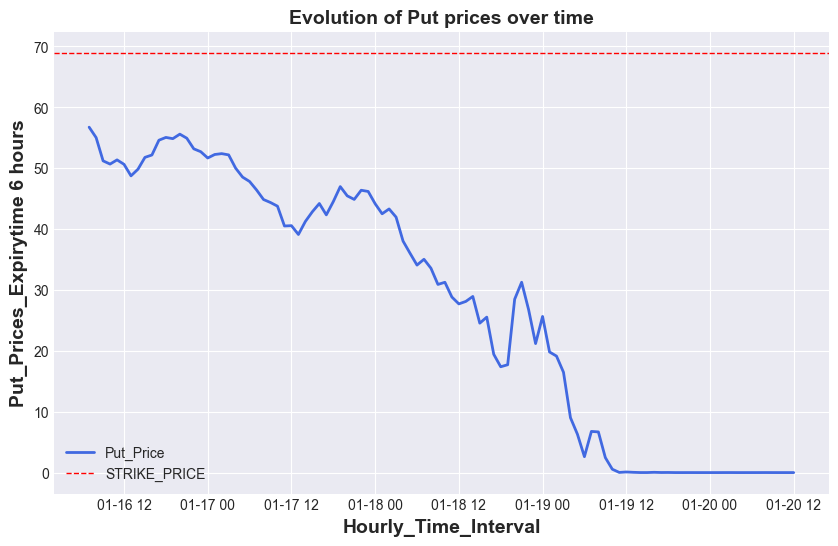

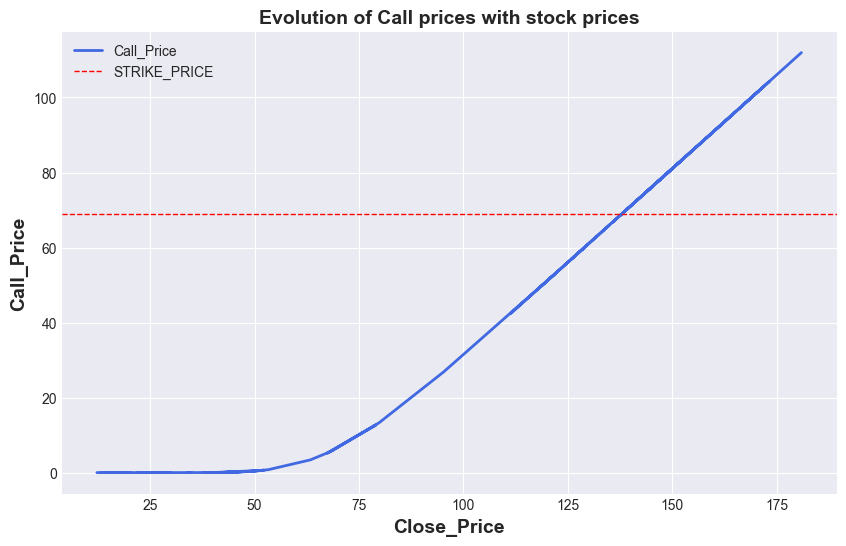

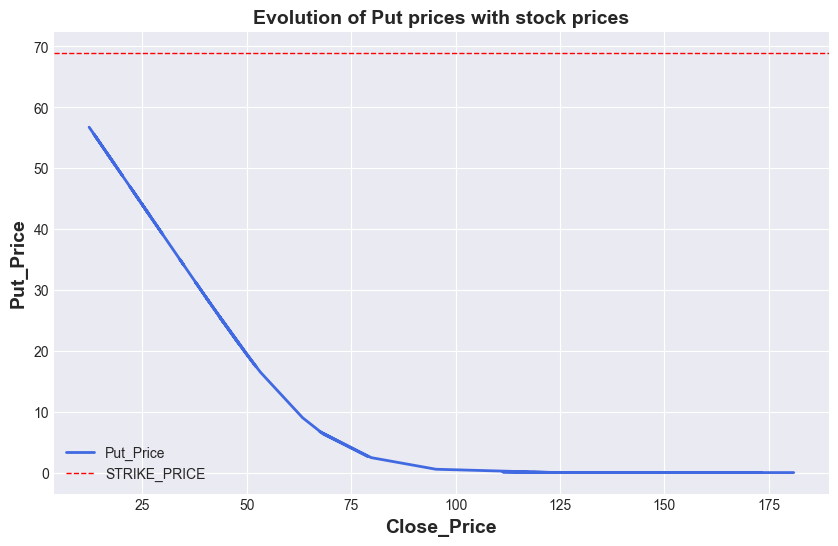

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import scipy.stats as stats 
import requests
import seaborn as sns
import os

def BSM(stock,strike,risk_free,time,volatility):
    stock_price = stock
    strike_price = strike
    risk_free_rate = risk_free
    time_to_maturity = time
    volatility = volatility
    price={}

    d1 = (np.log(stock_price/strike_price) + (risk_free_rate + volatility**2/2)*time_to_maturity)/(volatility*np.sqrt(time_to_maturity))
    d2 = d1 - volatility*np.sqrt(time_to_maturity)

    call_price = stock_price*stats.norm.cdf(d1) - strike_price*np.exp(-risk_free_rate*time_to_maturity)*stats.norm.cdf(d2)
    put_price = strike_price*np.exp(-risk_free_rate*time_to_maturity)*stats.norm.cdf(-d2) - stock_price*stats.norm.cdf(-d1)
    price['Call_Price'] = call_price
    price['Put_Price'] = put_price
    return price

## Fetching data from Pre loaded csv file for the apple stock

data=pd.read_csv('APPL_1D.csv')
data['time']=pd.to_datetime(data['time'],unit='ms')
data.set_index('time',inplace=True)

# fetching hourly data fro volatility calculation
hourly_data=data.resample('H').last()
hourly_data['log_return']=np.log(hourly_data['close']/hourly_data['close'].shift(1))
hourly_data.dropna(inplace=True)
volatility_hourly=hourly_data['log_return'].std(ddof=1)
volatility_hourly


# implementing BSM model for each hourly close price and calculating the respective call and put option prices for the given close prices 

option_values=pd.DataFrame()
strike=69
risk_free_hourly=1/32760    # assuming 5% annual treasury rate 
Time_expiry=6

hourly_data['option_prices']=hourly_data['close'].apply(BSM,args=(strike,risk_free_hourly,Time_expiry,volatility_hourly))
hourly_data['call_price']=hourly_data['option_prices'].apply(lambda x:x['Call_Price'])
hourly_data['put_price']=hourly_data['option_prices'].apply(lambda x:x['Put_Price'])

hourly_data.drop(columns=['option_prices'],inplace=True)
hourly_data.dropna(inplace=True)

option_values['Close']=hourly_data['close']
option_values['call_price']=hourly_data['call_price']
option_values['put_price']=hourly_data['put_price']


                                # creating RESULTS directory to store the plots and results
results_dir='RESULTS'
os.makedirs(results_dir,exist_ok=True)

# saving the option prices in the results folder 
csv_path=os.path.join(results_dir,'Option_Hourly_Prices.csv')
option_values.to_csv(csv_path,index=True)



                                    # plotting the above given data for visula understanding

                                    # PLOT for the hourly data and stock evolution

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['close'],label='Stock_price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Hourly_close_prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Stock Price Over Time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Stock_price.png')
plt.savefig(plot_filename,dpi=300)
plt.show()


                                # Plotting the Call prices vs time 

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['call_price'],label='Call_Price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel(f'Call_Prices_Expirytime {Time_expiry} hours',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of call prices over time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Call_price.png')
plt.savefig(plot_filename,dpi=300)
plt.show()



                                # plotting the put prices vs time

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['put_price'],label='Put_Price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel(f'Put_Prices_Expirytime {Time_expiry} hours',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Put prices over time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Put_price.png')
plt.savefig(plot_filename,dpi=300)
plt.show()


                                # plotting the Option prices vs the stock price
                                # Plotting the call price vs the close price

plt.figure(figsize=(10,6))
plt.plot(hourly_data['close'],hourly_data['call_price'],label='Call_Price',linewidth=2,color='royalblue')
plt.xlabel('Close_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Call_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Call prices with stock prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Call_Stock.png')
plt.savefig(plot_filename,dpi=300)
plt.show()

                                # Plotting the Put price vs the close price

plt.figure(figsize=(10,6))
plt.plot(hourly_data['close'],hourly_data['put_price'],label='Put_Price',linewidth=2,color='royalblue')
plt.xlabel('Close_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Put_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Put prices with stock prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Put_Stock.png')
plt.savefig(plot_filename,dpi=300)
plt.show()







# SIMULATING MONTE CARLO PATHS AND CALULATING OPTION PRICES USNG MONTE CARLO SIMULATION

In [7]:
def path_genearion(stock,risk_free_rate,volatility,duration,Noofpaths,Noofsteps):
    z=np.random.standard_normal((Noofpaths,Noofsteps))
    s=np.zeros((Noofpaths,Noofsteps+1))
    w=np.zeros((Noofpaths,Noofsteps+1))
    x=np.zeros((Noofpaths,Noofsteps+1))
    time=np.zeros(Noofsteps+1)
    result={}
    dt=duration/Noofsteps
    s[:,0]=stock
    w[:,0]=0
    x[:,0]=np.log(stock)
    time[0]=0
    for i in range(0,Noofsteps):
        if Noofpaths>=2:
            z[:,i]=(z[:,i]-np.mean(z[:,i]))/np.std(z[:,i])
            w[:,i+1]=w[:,i]+np.sqrt(dt)*z[:,i]
            s[:,i+1]=s[:,i]+risk_free_rate*dt*s[:,i] +volatility*s[:,i]*(w[:,i+1]-w[:,i])     
            x[:,i+1]=x[:,i]+(risk_free_rate-np.power(volatility,2)*0.5)*dt +volatility*(w[:,i+1]-w[:,i])
            time[i+1]=time[i]+dt
    result['Stock_price']=s
    result['Time']=time
    result['Log_stock']=x
    return result

def monte_carlo_option_pricing(type,strike,stock,risk_free_rate,volatility,duration,Noofpaths,Noofsteps):
    types=['call','put']
    type=type.lower()
    prices={}
    paths=path_genearion(stock,risk_free_rate,volatility,duration,Noofpaths,Noofsteps)
    stock_vals=paths['Stock_price']
    prices['call']=np.mean(np.maximum(stock_vals[:,-1]-strike,0))
    prices['put']=np.mean(np.maximum(strike-stock_vals[:,-1],0))
    if type in types:
        return prices[type]
    else:
        return print('wrong type found type values are call/put')
            
                                        # comparative analysis of pricng by black scholes model and monte carlo simulation
                                        
S_0=100                         # Initial stock value 
k=80                            # Strike price of 80 chosen for valuation
r=0.05                          # risk free rate as per us treasury bill 
volatility=0.2                  # volalitylty paramter for a 20% volalitle stock
duration=1                      # 1 year option duractio taken for comparison
Noofpaths=[100,500,1000,10000]  # list of paths taken to check for eror and convergence
Noofsteps=1000                  # NUmber of time stpes take as for standard consideration 
Price_BSM={}                    
                                # Empty dictrionary initialised for the prices 
Price_monte_carlo={} 
type=['Call','Put']
for type in type:
    Price_BSM[type]={}
    Price_monte_carlo[type]={}
    for N in Noofpaths:
        Price_BSM[type][f'{N}_step_price']=BSM(S_0,k,r,duration,volatility)[f'{type}_Price']
        Price_monte_carlo[type][f'{N}_step_price']=monte_carlo_option_pricing(type,k,S_0,r,volatility,duration,N,Noofsteps)

merge={'BLACK_SCHOLES_PRICING':pd.DataFrame(Price_BSM),'MONTE_CARLO_SIMULATION_PRICING':pd.DataFrame(Price_monte_carlo)}
PRICING_RESULTS=pd.concat(merge,axis=1)

PRICING_RESULTS
file_path=os.path.join(results_dir, 'PRICING_RESULTS.csv')
PRICING_RESULTS.to_csv(file_path)

                                                    
    

    
   